In [27]:
import uproot 
import mplhep
import matplotlib.pyplot as plt
import numpy as np
plt.style.use(mplhep.style.CMS)

In [23]:
f = uproot.open('fitDiagnostics.root')

In [5]:
f['shapes_fit_s/SinglePass'].keys()

['data;1',
 'non;1',
 'top;1',
 'w;1',
 'total;1',
 'total_signal;1',
 'total_background;1',
 'total_covar;1']

In [32]:
f['shapes_fit_s/Single{}/total_background'.format(reg)].to_numpy()

(array([0.13178398, 0.14776847, 0.165059  , 0.16940926, 0.1740293 ,
        0.19105163, 0.1923685 , 0.25034347, 0.27086714, 0.2782151 ,
        0.25807884, 0.20844814, 0.20644717, 0.16933803, 0.14904866,
        0.15774241, 0.1238244 , 0.07963822, 0.08458612, 0.08742127,
        0.07300852, 0.05900808, 0.05125346, 0.04733802, 0.03621037,
        0.03744273, 0.03002121, 0.02194562, 0.01222892, 0.02452385,
        0.02633458, 0.01835817, 0.01560606, 0.01543754, 0.01230129,
        0.00635043, 0.00857215, 0.01326213, 0.00789359, 0.01083355,
        0.00477392, 0.00530533, 0.00516907, 0.00291784, 0.00401494,
        0.00676423, 0.00667997, 0.00505255, 0.00092859, 0.00500055],
       dtype=float32),
 array([ 40. ,  43.6,  47.2,  50.8,  54.4,  58. ,  61.6,  65.2,  68.8,
         72.4,  76. ,  79.6,  83.2,  86.8,  90.4,  94. ,  97.6, 101.2,
        104.8, 108.4, 112. , 115.6, 119.2, 122.8, 126.4, 130. , 133.6,
        137.2, 140.8, 144.4, 148. , 151.6, 155.2, 158.8, 162.4, 166. ,
        169.

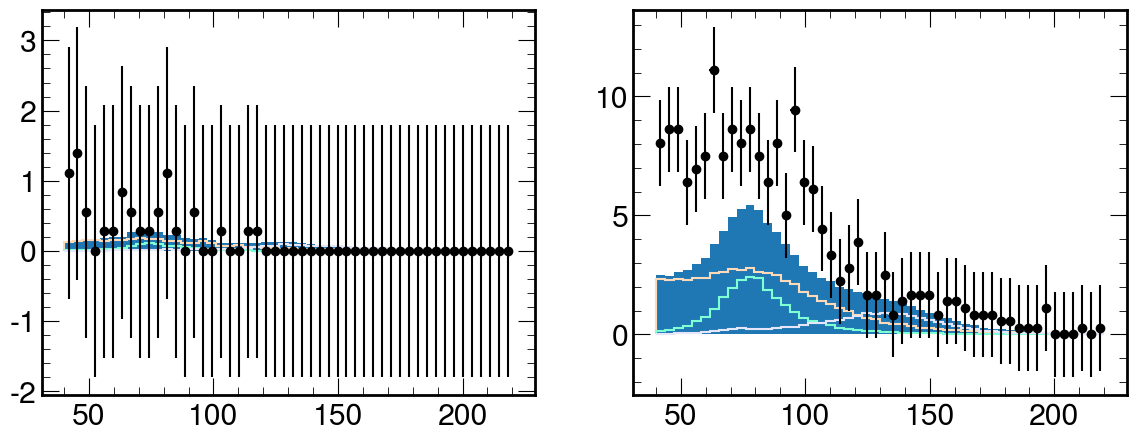

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

for reg, ax in zip(['Pass', 'Fail'], [ax1, ax2]):
    plt.sca(ax)
    hs = []
    
    h, bins = f['shapes_fit_s/Single{}/total'.format(reg)].to_numpy()
    mplhep.histplot(h, bins, histtype="fill")
    
    for key in ["non", "w", "top"]:
        h, bins = f['shapes_fit_s/Single{}/{}'.format(reg, key)].to_numpy()
        hs.append(h)
        
    xdata, ydata = f['shapes_fit_s/Single{}/data'.format(reg)].values()
    xerrdata, yerrdata = f['shapes_fit_s/Single{}/data'.format(reg)].errors(which="mean")
    plt.errorbar(xdata, ydata, xerrdata, yerrdata, fmt='o', c='k')

    mplhep.histplot(hs, bins, color=["peachpuff","aquamarine","lavender"])